In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Dataset 1 (Boston Housing Dataset)

In [85]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
medv = df['medv']

## Normalize data

In [87]:
data = df[df.columns[:]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

In [88]:
data['medv'] = medv

In [89]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


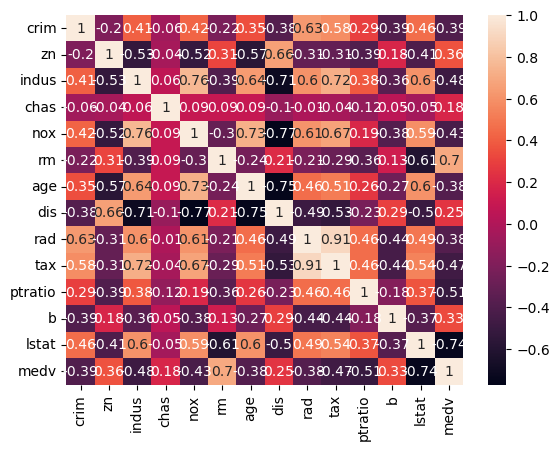

In [90]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Split the data into train and test

In [91]:
X = data.drop('medv', axis=1).to_numpy()
Y = data['medv'].to_numpy()

In [92]:
X.shape, Y.shape

((506, 13), (506,))

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [94]:
X_train = torch.tensor(x_train)#, device = device)
X_test = torch.tensor(x_test)#, device = device)
Y_train = torch.tensor(y_train.reshape(-1, 1))#, device = device)
Y_test = torch.tensor(y_test.reshape(-1, 1))#,  device = device)

## Linear regression model

In [95]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [96]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

In [97]:
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

## Training the model

In [98]:
#подберите параметры 
inputDim = X_train.shape[1]
outputDim = 1
learningRate = 0.05
num_epochs = 10

model = linearRegression(inputDim,outputDim)

In [99]:
x_train.shape

(404, 13)

In [100]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [101]:
error = []

In [102]:
for epoch in range(num_epochs):
    e = []
    for x, y in train_iter:
        output = model(x.float())
        l = criterion(output, y.float())
        e.append(l.item())
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch: ', epoch,'loss', np.mean(e))

epoch:  0 loss 108.3632272394692
epoch:  1 loss 22.72726923081933
epoch:  2 loss 25.056287102582978
epoch:  3 loss 24.558114656587925
epoch:  4 loss 23.60236296421144
epoch:  5 loss 23.500511762572497
epoch:  6 loss 22.85790626014151
epoch:  7 loss 23.028798690656338
epoch:  8 loss 25.008283830270535
epoch:  9 loss 23.99311255245674


In [103]:
with torch.no_grad(): 
    predicted = model(X_test.float())

## Evaluate the model

Задание 1. Посчитайте MSE RMSE для тестовых данных, напишите код который будет выводить примерную стоимость одного дома 

In [104]:
mse = torch.nn.MSELoss()
loss = mse(predicted, Y_test.float())
print('MSE:', loss.item())

MSE: 37.75064468383789


In [105]:
print('RMSE:', np.sqrt(loss.item()))

RMSE: 6.144155327124949


# Dataset 2 (Diabetes)

Задание 2. Основываясь на коде предоставленном выше постройте Логистическую регрессию, выведите precision, recoll, accuracy, confuxion matrix. Сравните результат с Random forest и SVM Model. 

In [106]:
df = pd.read_csv('diabetes.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              768 non-null    int64  
 1   Unnamed: 0                768 non-null    int64  
 2   Pregnancies               768 non-null    int64  
 3   Glucose                   768 non-null    int64  
 4   BloodPressure             768 non-null    int64  
 5   SkinThickness             768 non-null    int64  
 6   Insulin                   768 non-null    int64  
 7   BMI                       768 non-null    float64
 8   DiabetesPedigreeFunction  768 non-null    float64
 9   Age                       768 non-null    int64  
 10  Outcome                   768 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.1 KB


In [108]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,4,0,137,40,35,168,43.1,2.288,33,1


## Normalize Data

In [109]:
norm_df = df[df.columns[:]]
norm_df = norm_df.apply(
    lambda x: (x - x.mean()) / x.std()
)
norm_df['Outcome'] = df['Outcome']

In [110]:
norm_df.head()

,Unnamed: 0.1,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.728670,-1.728670,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-1.724163,-1.724163,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,-1.719655,-1.719655,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-1.715148,-1.715148,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.710640,-1.710640,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


## Split the data into train and test

In [111]:
X = norm_df.drop('Outcome', axis=1).to_numpy()
Y = norm_df['Outcome'].to_numpy()

In [112]:
X.shape, Y.shape

((768, 10), (768,))

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [114]:
X_train = torch.tensor(x_train)
X_test = torch.tensor(x_test)
Y_train = torch.tensor(y_train.reshape(-1, 1))
Y_test = torch.tensor(y_test.reshape(-1, 1))

In [115]:
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)

In [116]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

In [117]:
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
learning_rate = 0.05
num_epochs = 100

## Custom model

In [118]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        self.lr1 = nn.Linear(input_dim, 4)
        self.lr2 = nn.Linear(4, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.lr1(x))
        x = self.sigmoid(self.lr2(x))
        return x

In [119]:
model = Model(input_dim=input_dim, output_dim=output_dim)

In [120]:
model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.0145, -0.1263,  0.1415,  0.2829, -0.0541, -0.2739,  0.2121, -0.0764,
                       -0.2497,  0.2434],
                      [-0.0861,  0.3006, -0.1787, -0.2950, -0.1241,  0.1474, -0.0822, -0.0166,
                        0.1606, -0.2134],
                      [ 0.1365, -0.0939,  0.0561,  0.1165,  0.2275,  0.0393,  0.1218, -0.0157,
                       -0.1564, -0.1120],
                      [ 0.1562,  0.2044, -0.1459, -0.2082,  0.2797,  0.1812, -0.3056,  0.2709,
                        0.1433,  0.1412]])),
             ('lr1.bias', tensor([-0.0512, -0.3131, -0.1667, -0.3028])),
             ('lr2.weight', tensor([[0.4069, 0.2774, 0.0043, 0.4786]])),
             ('lr2.bias', tensor([0.0569]))])

In [121]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Training the model

In [122]:
train_loss, test_loss, test_acc, train_acc = [], [], [], []

for epoch in range(num_epochs):
    train_epoch_loss = []
    for x, y in train_loader:
        y_hat = model(x.float())
        loss = criterion(y_hat, y.float())
        train_epoch_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(np.mean(train_epoch_loss))

    model.eval()
    test_epoch_loss = []
    correct = 0
    total = 0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            y_test_hat = model(x_test.float())
            loss = criterion(y_test_hat, y_test.float())
            test_epoch_loss.append(loss.item())

            predicted = (y_test_hat > 0.5).float()
            correct += (predicted == y_test).sum().item()
            total += y_test.size(0)
    test_loss.append(np.mean(test_epoch_loss))
    accuracy = round(correct/total * 100, 2)

    print('epoch: ', epoch, 'train_loss:', train_loss[-1], 'test_loss:', test_loss[-1], 'accuracy:', accuracy)

epoch:  0 train_loss: 0.7311339964789729 test_loss: 0.7099479995667934 accuracy: 37.66
epoch:  1 train_loss: 0.7261290261822362 test_loss: 0.7070303969085217 accuracy: 37.66
epoch:  2 train_loss: 0.7228603353423457 test_loss: 0.7065204940736294 accuracy: 37.66
epoch:  3 train_loss: 0.7177900873845623 test_loss: 0.7018489874899387 accuracy: 37.66
epoch:  4 train_loss: 0.7148359850529702 test_loss: 0.7011917755007744 accuracy: 46.75
epoch:  5 train_loss: 0.7113856509808572 test_loss: 0.6942930668592453 accuracy: 48.05
epoch:  6 train_loss: 0.7076577967213046 test_loss: 0.6952401138842106 accuracy: 50.0
epoch:  7 train_loss: 0.7047700295525212 test_loss: 0.6911550126969814 accuracy: 56.49
epoch:  8 train_loss: 0.7018957878312757 test_loss: 0.691892147064209 accuracy: 58.44
epoch:  9 train_loss: 0.7000505328178406 test_loss: 0.6882718913257122 accuracy: 60.39
epoch:  10 train_loss: 0.6964875526966587 test_loss: 0.6861833371222019 accuracy: 62.34
epoch:  11 train_loss: 0.6936638249504951 te

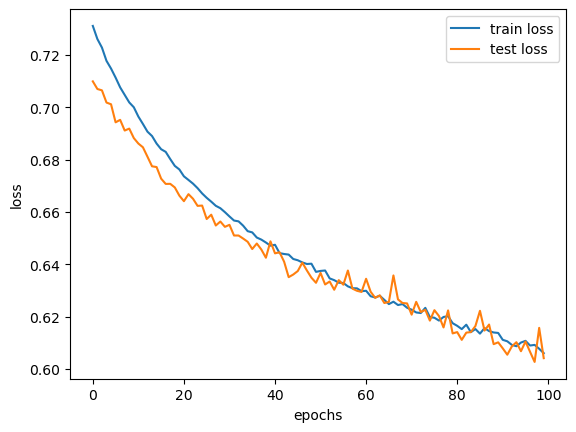

In [123]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss') 
plt.legend() 
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [124]:
with torch.no_grad():
    predicted = model(X_test.float())
predicted = (predicted > 0.5).float()

In [125]:
def compute_metrics(y_true: np.array, y_pred: np.array) -> tuple[float, float, float, float]:
    tp = torch.sum(y_true * y_pred)
    tn = torch.sum((1 - y_true) * (1 - y_pred))
    fp = torch.sum((1 - y_true) * y_pred)
    fn = torch.sum(y_true * (1 - y_pred))
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / y_true.size(0)
    cm = [[tn.item(), fp.item()], [fn.item(), tp.item()]]
    return cm, recall, precision, accuracy

## Evaluate the model

In [126]:
cm, recall, precision, accuracy = compute_metrics(Y_test, predicted)
print('Recall:', recall.item())
print('Precision:', precision.item())
print('Accuracy:', accuracy.item())

Recall: 0.22413793206214905
Precision: 0.8666666746139526
Accuracy: 0.6948052048683167


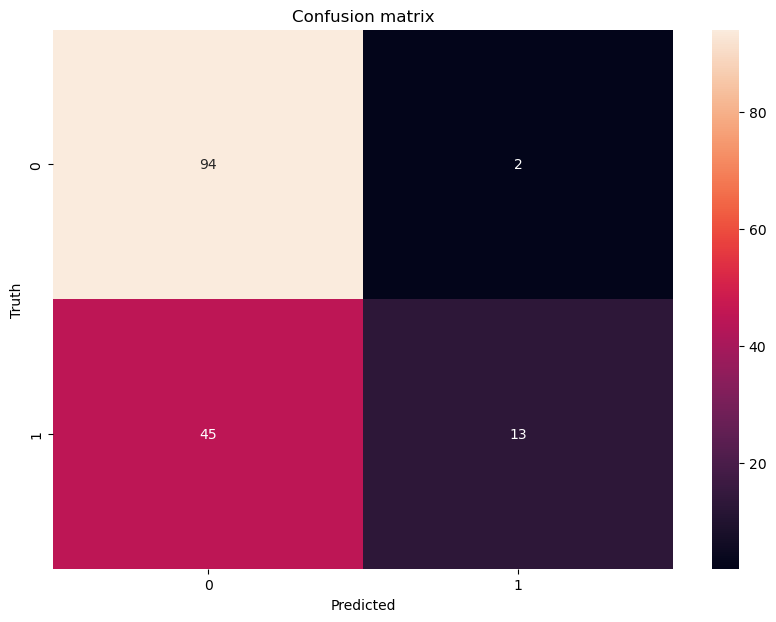

In [127]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')
plt.show()

Recall: 0.6551724137931034
Precision: 0.7169811320754716
Accuracy: 0.7727272727272727


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


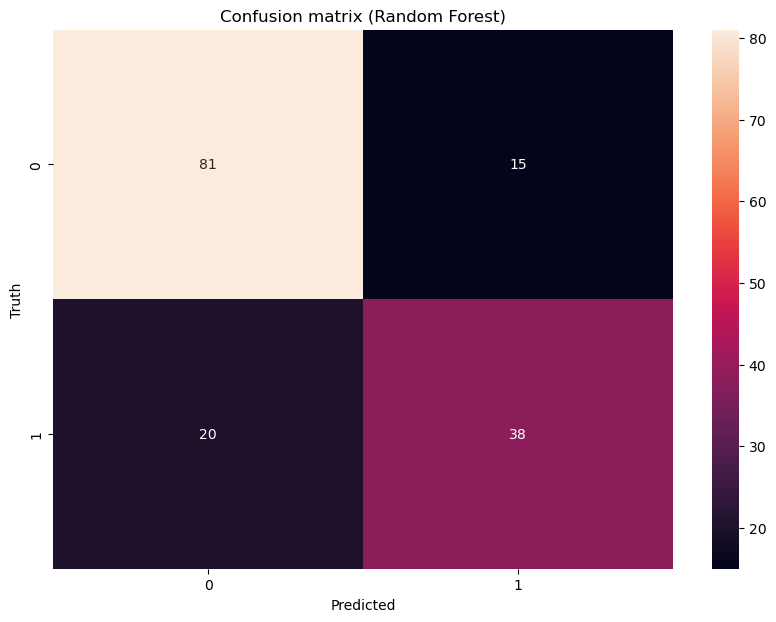

In [128]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, Y_train)

predicted = rf.predict(X_test)
rf_recall = recall_score(Y_test, predicted)
rf_precision = precision_score(Y_test, predicted)
rf_accuracy = accuracy_score(Y_test, predicted)
rf_cm = confusion_matrix(Y_test, predicted)

print('Recall:', rf_recall)
print('Precision:', rf_precision)
print('Accuracy:', rf_accuracy)

plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix (Random Forest)')
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall: 0.6551724137931034
Precision: 0.7169811320754716
Accuracy: 0.7727272727272727


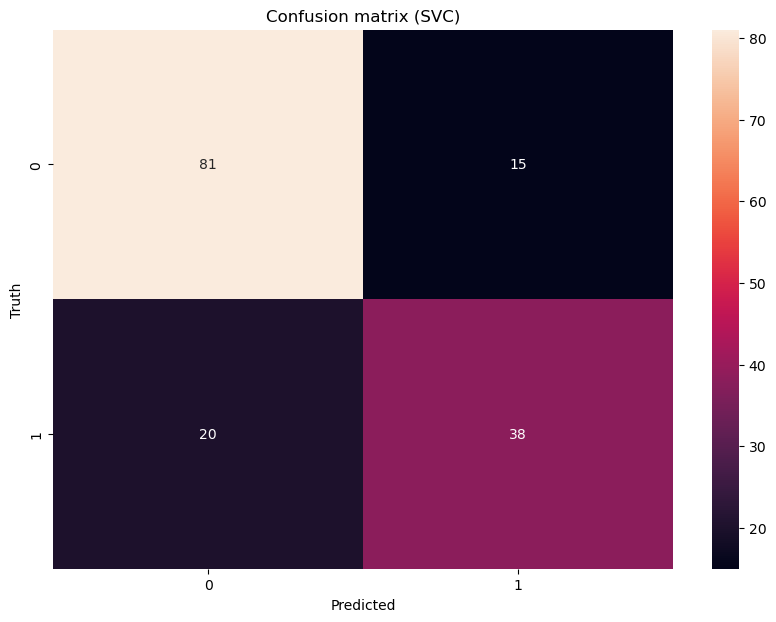

In [129]:
svc = SVC(kernel='linear', random_state=123)
svc.fit(X_train, Y_train)

predicted = rf.predict(X_test)
svc_recall = recall_score(Y_test, predicted)
svc_precision = precision_score(Y_test, predicted)
svc_accuracy = accuracy_score(Y_test, predicted)
svc_cm = confusion_matrix(Y_test, predicted)

print('Recall:', svc_recall)
print('Precision:', svc_precision)
print('Accuracy:', svc_accuracy)

plt.figure(figsize=(10, 7))
sns.heatmap(svc_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix (SVC)')
plt.show()

## Compare the models

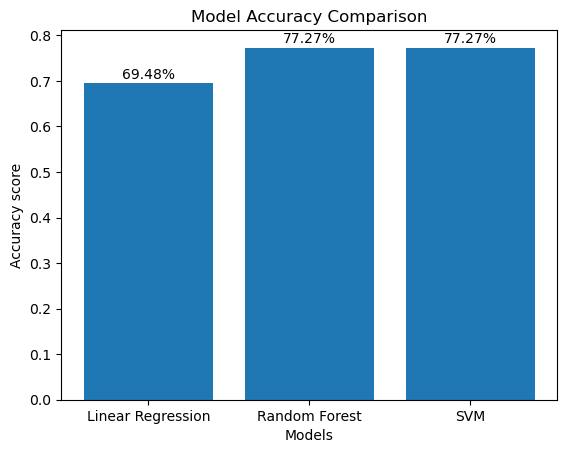

In [130]:
models = ['Linear Regression', 'Random Forest', 'SVM']
accuracies = [accuracy.item(), rf_accuracy, svc_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy Comparison')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v * 100:.2f}%', ha='center')

plt.show()